<a href="https://colab.research.google.com/github/AanchalA/PyTorch-Deep-Learning-Bootcamp/blob/main/04_pytorch_custom_datasets_food_vision_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing PyTorch and Setting Up Device Agnostic Code

In [ ]:
import torch

torch.__version__

'2.4.0+cu121'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


# Get Data
- https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb

In [ ]:
# import os
# import shutil
# import random
# from pathlib import Path
# from torchvision import datasets, transforms

## Downloading the Data

In [ ]:
# # Setup data directory
# data_dir = Path("../data")

In [ ]:
# # Get training data
# train_data = datasets.Food101(root=data_dir,
#                               split="train",
#                               # transform=transforms.ToTensor(),
#                               download=True)

# # Get testing data
# test_data = datasets.Food101(root=data_dir,
#                              split="test",
#                              # transform=transforms.ToTensor(),
#                              download=True)

In [ ]:
# train_data, test_data

In [ ]:
# class_names = train_data.classes
# len(class_names)

## Find Subset of Appropriate Classes
- Want: Steak, pizza, sushi
- Current path setup: ../data/food-101/images/CLASS_NAME/IMAGES.jpg
- Going to get a list of the different target image classes (pizza, steak, sushi) filenames and then copy the images to separate folders.
- Taking a random 10% of the images from the target classes from both datasets.


In [ ]:
# # Setup data paths
# data_path = data_dir / "food-101" / "images"
# target_classes = ["pizza", "steak", "sushi"]

# # Change amount of data to get (e.g. 0.1 = random 10%, 0.2 = random 20%)
# amount_to_get = 0.2

In [ ]:
# def get_subset(image_path=data_path,
#                data_splits=["train", "test"],
#                target_classes=["pizza", "steak", "sushi"],
#                amount=0.1,
#                seed=42):
#     random.seed(seed)
#     label_splits = {}

#     # Get labels
#     for data_split in data_splits:
#         print(f"[INFO] Creating image split for: {data_split}...")
#         label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
#         with open(label_path, "r") as f:
#             labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

#         # Get random subset of target classes image ID's
#         number_to_sample = round(amount * len(labels))
#         print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
#         sampled_images = random.sample(labels, k=number_to_sample)

#         # Apply full paths
#         image_paths = [Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
#         label_splits[data_split] = image_paths

#     return label_splits

In [ ]:
# label_splits = get_subset(amount=amount_to_get)
# label_splits["train"][:5]

## Move Training and Testing Images to Dedicated Folders

In [ ]:
# # Create target directory path
# target_dir_name = f"../data/pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
# print(f"Creating directory: '{target_dir_name}'")

# # Setup the directories
# target_dir = Path(target_dir_name)

# # Make the directories
# target_dir.mkdir(parents=True, exist_ok=True)

In [ ]:
# for image_split in label_splits.keys():
#     for image_path in label_splits[str(image_split)]:
#         dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
#         if not dest_dir.parent.is_dir():
#             dest_dir.parent.mkdir(parents=True, exist_ok=True)
#         # print(f"[INFO] Copying {image_path} to {dest_dir}...")
#         shutil.copy2(image_path, dest_dir)

## Zip Up Images Folder to be More Easily Transported

In [ ]:
# zip_file_name = data_dir / f"pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"

# shutil.make_archive(zip_file_name,
#                     format="zip",
#                     root_dir=target_dir)

In [ ]:
# ! mkdir -p pizza_steak_sushi
# ! unzip ../data/pizza_steak_sushi_20_percent.zip -d pizza_steak_sushi

In [ ]:
# !ls ../data

In [ ]:
# walk_through_dir("pizza_steak_sushi")

## Remove Unused Data

In [ ]:
## Remove extra data

# os.remove("pizza_steak_sushi")
# shutil.rmtree("pizza_steak_sushi")

## Downloading the ZIP of Selected Classes

In [ ]:
import os
import zipfile
import requests
from pathlib import Path

In [ ]:
# Setup path to data folder

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

NameError: name 'Path' is not defined

In [ ]:
# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


## Data Walkthrough

In [ ]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os

  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


## Setting up the Train and Test Data Path

In [ ]:
# data_dir = Path("pizza_steak_sushi")
# train_dir = Path("pizza_steak_sushi/train")
# test_dir = Path("pizza_steak_sushi/test")

# train_dir, test_dir

In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# Visualizing the Data

In [ ]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

random.seed(42)

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
len(image_path_list), image_path_list[:5]

(300,
 [PosixPath('data/pizza_steak_sushi/train/steak/3142674.jpg'),
  PosixPath('data/pizza_steak_sushi/train/steak/3245622.jpg'),
  PosixPath('data/pizza_steak_sushi/train/steak/2606444.jpg'),
  PosixPath('data/pizza_steak_sushi/train/steak/1736968.jpg'),
  PosixPath('data/pizza_steak_sushi/train/steak/2163079.jpg')])

In [ ]:
random_image_path = random.choice(image_path_list)
print(random_image_path)

data/pizza_steak_sushi/train/steak/1976160.jpg


In [ ]:
# Get the image class from the image path (name of the parent directory of the image)
image_class = random_image_path.parent.stem
print(image_class)

steak


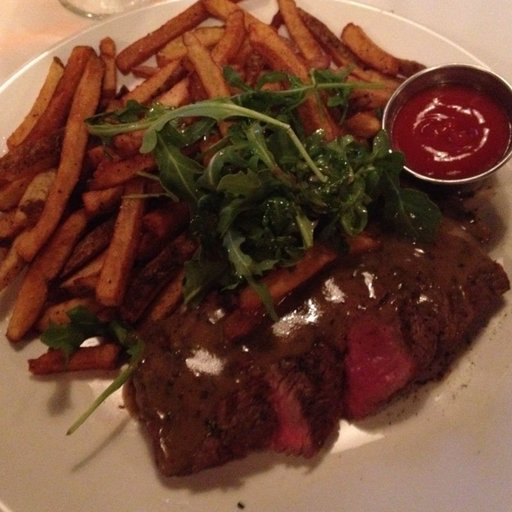

In [ ]:
# Open the Image
image = Image.open(random_image_path)
image

In [ ]:
# Print Image Metadata

print(f"Random Image Path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image Height: {image.height}")
print(f"Image Width: {image.width}")

Random Image Path: data/pizza_steak_sushi/train/steak/1976160.jpg
Image Class: steak
Image Height: 512
Image Width: 512


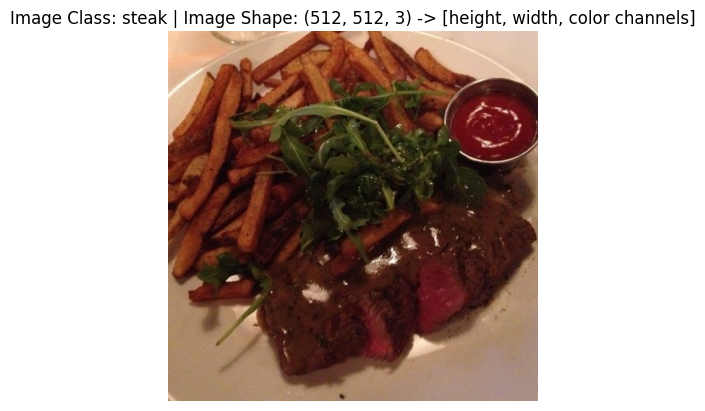

In [ ]:
img_as_array = np.asarray(image)
plt.title(f"Image Class: {image_class} | Image Shape: {img_as_array.shape} -> [height, width, color channels]")
plt.axis(False)
plt.imshow(img_as_array)

array([[[252, 209, 167],
        [250, 207, 165],
        [248, 205, 163],
        ...,
        [222, 195, 178],
        [225, 198, 181],
        [230, 203, 186]],

       [[251, 208, 166],
        [250, 207, 165],
        [248, 205, 163],
        ...,
        [226, 199, 182],
        [226, 199, 182],
        [227, 200, 183]],

       [[250, 207, 165],
        [249, 206, 164],
        [249, 206, 164],
        ...,
        [229, 202, 183],
        [227, 200, 181],
        [225, 198, 179]],

       ...,

       [[180, 145, 115],
        [195, 160, 130],
        [211, 176, 146],
        ...,
        [175, 149, 136],
        [174, 148, 133],
        [168, 142, 127]],

       [[171, 136, 106],
        [180, 145, 115],
        [195, 160, 130],
        ...,
        [175, 149, 136],
        [174, 148, 133],
        [172, 146, 131]],

       [[169, 134, 104],
        [172, 137, 107],
        [183, 148, 118],
        ...,
        [175, 149, 136],
        [174, 148, 133],
        [176, 150, 135]]], dtype=uint8)
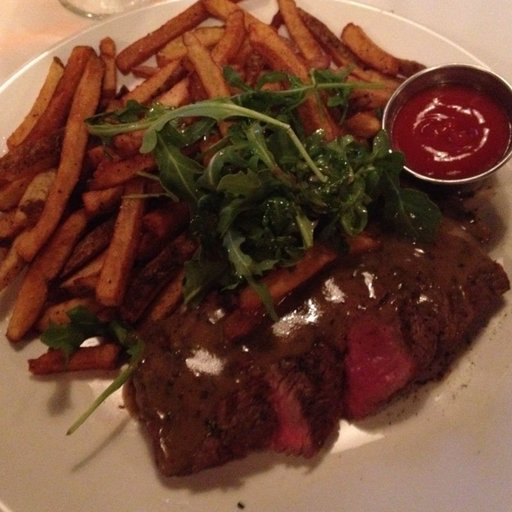

In [ ]:
img_as_array

# Transforming Data

In [ ]:
from torch.utils.data import dataloader
from torchvision import datasets, transforms

In [ ]:
data_transforms = transforms.Compose([
    # Resize all images to size - 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal axis
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn Image to Torch Tensor.
    transforms.ToTensor()
])

In [ ]:
data_transforms(image).shape

torch.Size([3, 64, 64])

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    """
    1. Select random images from a path of images
    2. load selected images
    3. Transform the loaded images
    4. Plot original vs transformed images
    """
    if seed:
        random.seed(seed)

    selected_images = random.sample(image_paths, k=n)

    for image_path in selected_images:
        with Image.open(image_path) as img:
            fig, ax = plt.subplots(nrows=1, ncols=2)

            ax[0].imshow(img)
            ax[0].set_title(f"Original Image \nShape: {img.size}", fontsize=10)
            ax[0].axis("off")

            # Transform and plot the transformed image
            transformed_image = transform(img).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed Image \nShape: {transformed_image.shape}", fontsize=10)
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=14)

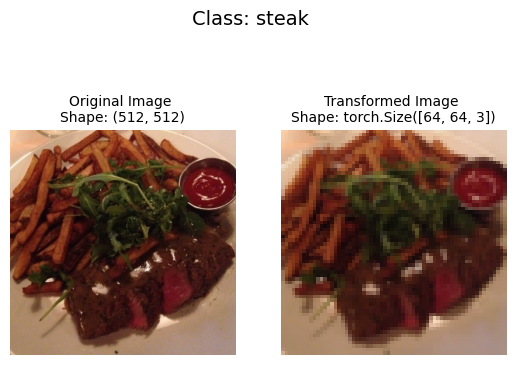

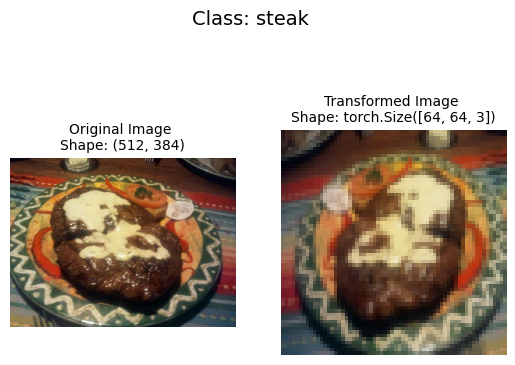

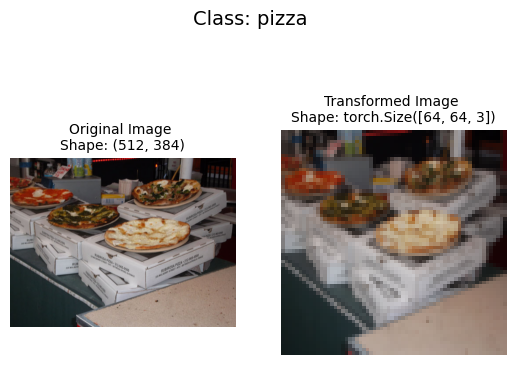

In [ ]:
plot_transformed_images(image_paths=image_path_list, transform=data_transforms, n=3, seed=42)

# Option 1: Loading Data Using `torch.ImageFolder()`


In [ ]:
from torchvision.datasets import ImageFolder

In [ ]:
train_data = ImageFolder(root=train_dir,
                         transform=data_transforms,
                         target_transform=None)
train_data, len(train_data)

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 225)

In [ ]:
test_data = ImageFolder(root=test_dir,
                        transform=data_transforms,
                        target_transform=None)
test_data, len(test_data)

(Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 75)

In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

## Exploring the Data

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
image, label = train_data[0][0], train_data[0][1]
image.shape, image.dtype, label, type(label), class_names[label]

(torch.Size([3, 64, 64]), torch.float32, 0, int, 'pizza')

In [ ]:
img_permute = image.permute(1, 2, 0)
img_permute.shape

torch.Size([64, 64, 3])

Text(0.5, 1.0, 'Label: pizza')

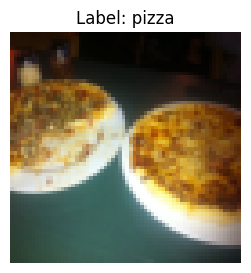

In [ ]:
plt.figure(figsize=(5, 3))
plt.imshow(img_permute)
plt.axis(False)
plt.title(f"Label: {class_names[label]}", fontsize=12)

## Turn Dataset into a DataLoader

In [ ]:
import os
from torch.utils.data import DataLoader

In [ ]:
num_workers = os.cpu_count()

In [ ]:
train_dataloader = DataLoader(dataset=train_data, batch_size=32, num_workers=os.cpu_count(), shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, num_workers=os.cpu_count(), shuffle=False)

In [ ]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [ ]:
image, label = next(iter(train_dataloader))
image.shape, image.min(), image.max(), label.shape

(torch.Size([32, 3, 64, 64]), tensor(0.), tensor(1.), torch.Size([32]))

# Option 2: Loading Custom Data Using `torch.Dataset`

- Load images from file
- Get class names from dataset
- Get class and index as dictionary from dataset

In [ ]:
from pathlib import Path
from torch.utils.data import Dataset
from typing import Tuple, Dict, List

### Creating helper function to get class names

- Make sure the data is stored in standard image classification directory format.
- Using `os.scandir()` get class names
- Raise error if class names not found
- Return class names as list and class_to_idx dict.

In [ ]:
target_dir = train_dir
print(f"Target Directory: {train_dir}")

# Get class names from target dir
class_names_found = sorted([entry.name for entry in list(os.scandir(target_dir))])
class_names_found

Target Directory: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """ Finds the class folder names in a target directory. """
    classes = sorted([entry.name for entry in list(os.scandir(directory)) if entry.is_dir()])

    if not classes:
        raise FileNotFoundError(f"Could not find any classes in {directory}...please check file structure.")

    # Creating a dict of index labels
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

    return classes, class_to_idx

In [ ]:
find_classes(directory=target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
class Food3Dataset(Dataset):

    def __init__(self, target_directory: str, transform=None):
        self.paths = list(Path(target_directory).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(directory=target_directory)

    def load_image(self, index: int) -> Image.Image:
        """ Opens Image using PIL.Image.Open(image_path) and returns the PIL Image."""
        return Image.open(self.paths[index])

    def __len__(self) -> int:
        return len(self.paths)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        """ Returns one sample of the data - Image and Label (X, y). """

        image = self.load_image(index)
        if self.transform:
            image = self.transform(image)
        label = self.paths[index].parent.stem
        label_idx = self.class_to_idx[label]
        return image, label_idx

In [ ]:
train_data_custom = Food3Dataset(target_directory=train_dir,
                                 transform=data_transforms)
len(train_data_custom)

225

In [ ]:
test_data_custom = Food3Dataset(target_directory=test_dir,
                                transform=data_transforms)
len(test_data_custom)

75

In [ ]:
image, label = train_data_custom[0]
image.shape, label

(torch.Size([3, 64, 64]), 1)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

# Function to Visualize Random Inages

In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str],
                          num_images=10,
                          display_shape: bool=True,
                          seed=None):

    if num_images > 10:
        num_images = 10
        display_shape = False
    if seed:
        random.seed(seed)
    random_idx_list = random.sample(range(len(dataset)), k=num_images)

    plt.figure(figsize=(16, 8))
    for i, sample_idx in enumerate(random_idx_list):
        image, label = dataset[sample_idx][0], dataset[sample_idx][1]
        plt.subplot(1, num_images, i+1)
        plt.imshow(image.permute(1, 2, 0))
        plt.axis(False)
        if display_shape:
            plt.title(f"Class: {classes[label]} \nShape: {image.shape}")
        else:
            plt.title(f"Class: {classes[label]}")

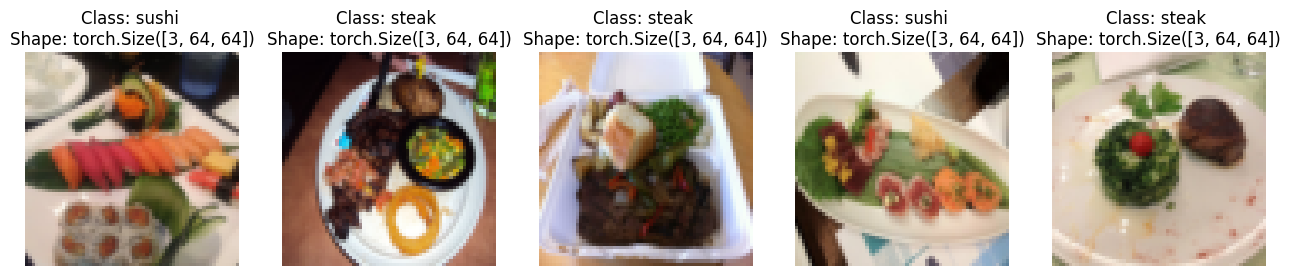

In [ ]:
display_random_images(train_data_custom,
                          classes=class_names,
                          num_images=5,
                          display_shape=True,
                          seed=42)

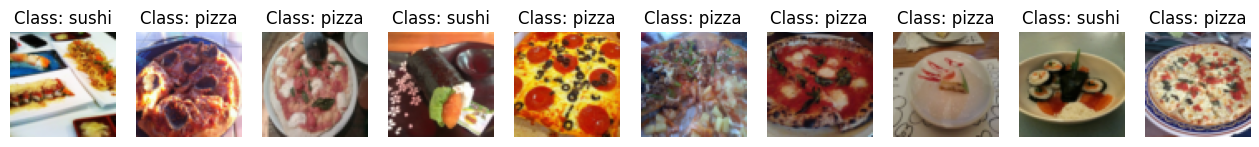

In [ ]:
display_random_images(train_data,
                      classes=class_names,
                      num_images=20,
                      display_shape=False,
                      seed=42)

## DataLoader for Custom Dataset

In [ ]:
train_dataloader = DataLoader(dataset=train_data_custom, batch_size=32, num_workers=os.cpu_count(), shuffle=True)
test_dataloader = DataLoader(dataset=test_data_custom, batch_size=32, num_workers=os.cpu_count(), shuffle=False)

In [ ]:
image, label = next(iter(train_dataloader))
image.shape, image.min(), image.max(), label.shape

(torch.Size([32, 3, 64, 64]), tensor(0.), tensor(1.), torch.Size([32]))

# Data Augmentation

## Trivial Augment

In [ ]:
from torchvision import transforms

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:5]

[PosixPath('data/pizza_steak_sushi/train/steak/3142674.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3245622.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2606444.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1736968.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2163079.jpg')]

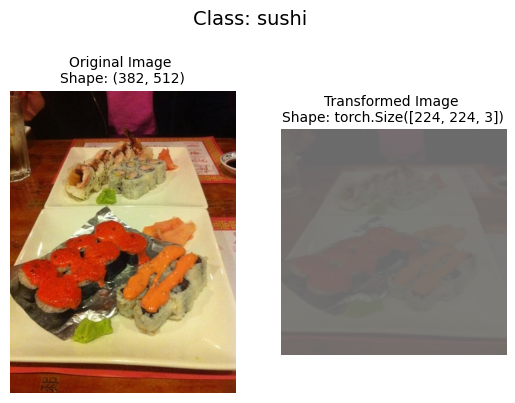

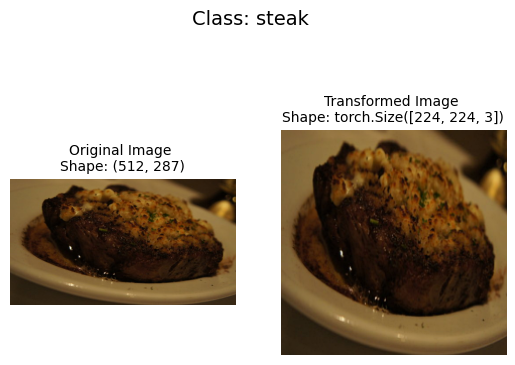

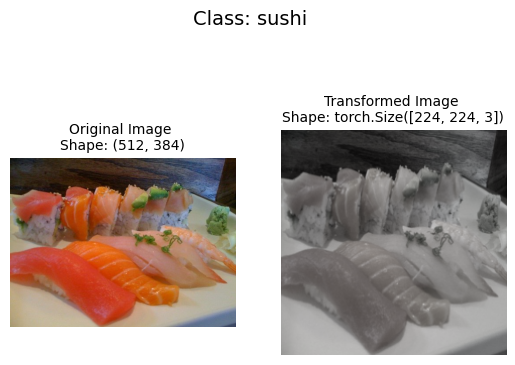

In [ ]:
# Plot random transformed images
plot_transformed_images(image_paths=image_path_list, transform=train_transform, n=3, seed=None)

In [ ]:
train_transform(Image.open(image_path_list[0])).shape

torch.Size([3, 224, 224])

# Model Version 0: TinyVGG Without Data Augmentation

In [ ]:
import os
from pathlib import Path
from tqdm.auto import tqdm
from timeit import default_timer as timer

import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

try:
    from torchinfo import summary
except:
    ! pip install -q torchinfo
    from torchinfo import summary

try:
    import torchmetrics
except:
    ! pip install -q torchmetrics
    import torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 15.2 MB/s eta 0:00:00


In [ ]:
class Food3ModelV0(nn.Module):
    def __init__(self, in_channels: int, hidden_units: int, out_shape: int):
        super(Food3ModelV0, self).__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classification = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=13*13*hidden_units, out_features=out_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classification(x)
        # print(x.shape)
        return x

In [ ]:
device = torch.device("cuda: 0") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cpu')

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn: torchmetrics.Accuracy,
               device: torch.device=device):
    model.train()
    train_loss, train_accuracy = 0, 0

    for X_train_batch, y_train_batch in dataloader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        train_batch_logits = model(X_train_batch)#.squeeze()

        train_batch_loss = loss_fn(train_batch_logits, y_train_batch)
        train_loss += train_batch_loss.item()

        # train_batch_preds = torch.softmax(train_batch_logits, dim=1).argmax(dim=1)
        # train_accuracy += accuracy_fn(train_batch_preds, y_train_batch)
        train_batch_preds = torch.argmax(torch.softmax(train_batch_logits, dim=1), dim=1)
        train_accuracy += (train_batch_preds == y_train_batch).sum().item() / len(y_train_batch)

        optimizer.zero_grad()
        train_batch_loss.backward()
        optimizer.step()

    # Normalize the total_loss and total_accuracy to get the average loss and accuracy per batch
    train_loss /= len(dataloader)
    train_accuracy /= len(dataloader)

    return train_loss, train_accuracy

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn: torchmetrics.Accuracy,
              device: torch.device=device):

    model.eval()
    test_loss, test_accuracy = 0, 0

    with torch.inference_mode():
        for X_test_batch, y_test_batch in dataloader:
            X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)
            test_batch_logits = model(X_test_batch)#.squeeze()

            test_batch_loss = loss_fn(test_batch_logits, y_test_batch)
            test_loss += test_batch_loss.item()

            # test_batch_preds = torch.softmax(test_batch_logits, dim=1).argmax(dim=1)
            # test_accuracy += accuracy_fn(test_batch_preds, y_test_batch)
            test_batch_preds = torch.argmax(torch.softmax(test_batch_logits, dim=1), dim=1)
            test_accuracy += (test_batch_preds == y_test_batch).sum().item() / len(y_test_batch)

    # Normalizing the loss and accuracy to get the average
    test_loss /= len(dataloader)
    test_accuracy /= len(dataloader)

    return test_loss, test_accuracy

In [ ]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          accuracy_fn: torchmetrics.Accuracy,
          device: torch.device=device,
          epochs: int=5):

    results = {"train_loss": [],
               "train_accuracy": [],
               "test_loss": [],
               "test_accuracy": []}

    for epoch in tqdm(range(epochs)):

        train_loss, train_accuracy = train_step(model=model,
                                                dataloader=train_dataloader,
                                                loss_fn=loss_fn,
                                                optimizer=optimizer,
                                                accuracy_fn=accuracy_fn,
                                                device=device)

        test_loss, test_accuracy = test_step(model=model,
                                             dataloader=test_dataloader,
                                             loss_fn=loss_fn,
                                             accuracy_fn=accuracy_fn,
                                             device=device)

        print(f"EPOCH: {epoch} | Train Loss: {train_loss: .4f}, Train Accuracy: {train_accuracy: .2f}% | "
                                f"Test Loss: {test_loss: .4f}, Test Accuracy: {test_accuracy: .2f}%")

        results["train_loss"].append(train_loss)
        results["train_accuracy"].append(train_accuracy)
        results["test_loss"].append(test_loss)
        results["test_accuracy"].append(test_accuracy)

    return results

In [ ]:
# Loading the Food Images Dataset
images_path = Path("/content/data/pizza_steak_sushi")
train_dir = images_path / "train"
test_dir = images_path / "test"

In [ ]:
# Creating a simple transform
simple_transform = transforms.Compose([transforms.Resize(size=(64, 64)),
                                       transforms.ToTensor()])

In [ ]:
train_data_simple = ImageFolder(root=train_dir,
                                transform=simple_transform,
                                target_transform=None)

test_data_simple = ImageFolder(root=test_dir,
                               transform=simple_transform)

train_data_simple, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: /content/data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: /content/data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
NUM_EPOCHS = 5
BATCH_SIZE = 32
NUM_WORKERS = int(os.cpu_count())
LEARNING_RATE = 0.001

In [ ]:
## Creating a dataloader for the datasets
train_dataloader_simple = DataLoader(train_data_simple, batch_size=BATCH_SIZE,
                                     shuffle=True, num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, batch_size=BATCH_SIZE,
                                    shuffle=False, num_workers=NUM_WORKERS)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_v0 = Food3ModelV0(in_channels=3, hidden_units=10, out_shape=len(train_data_simple.classes)).to(device)
model_v0

Food3ModelV0(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
model_v0(train_data_simple[0][0].unsqueeze(dim=0))

tensor([[ 0.0170, -0.0053,  0.0128]], grad_fn=<AddmmBackward0>)

In [ ]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
output = model_v0(image_batch)
output.shape

torch.Size([32, 3])

In [ ]:
summary(model_v0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
Food3ModelV0                             [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_v0.parameters(), lr=LEARNING_RATE)
accuracy_fn = torchmetrics.Accuracy(task="multiclass", num_classes=len(train_data_simple.classes)).to(device)

loss_fn, optimizer, accuracy_fn

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ),
 MulticlassAccuracy())

In [ ]:
start_time = timer()

model_0_results = train(model=model_v0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        accuracy_fn=accuracy_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time: .3f} seconds.")

  0%|          | 0/5 [00:00<?, ?it/s]

EPOCH: 0 | Train Loss:  1.1100, Train Accuracy:  0.28% | Test Loss:  1.0988, Test Accuracy:  0.20%
EPOCH: 1 | Train Loss:  1.0868, Train Accuracy:  0.41% | Test Loss:  1.1458, Test Accuracy:  0.20%
EPOCH: 2 | Train Loss:  1.0857, Train Accuracy:  0.41% | Test Loss:  1.1818, Test Accuracy:  0.20%
EPOCH: 3 | Train Loss:  1.0790, Train Accuracy:  0.41% | Test Loss:  1.1751, Test Accuracy:  0.20%
EPOCH: 4 | Train Loss:  1.0698, Train Accuracy:  0.41% | Test Loss:  1.1699, Test Accuracy:  0.20%
Total training time:  20.150 seconds.


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = Food3ModelV0(in_channels=3,                       # number of color channels (3 for RGB)
                       hidden_units=10,
                       out_shape=len(train_data_simple.classes)).to(device)

optimizer = torch.optim.Adam(params=model_0.parameters(), lr=LEARNING_RATE)

start_time = timer()
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        accuracy_fn=accuracy_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

EPOCH: 0 | Train Loss:  1.1063, Train Accuracy:  0.30% | Test Loss:  1.0983, Test Accuracy:  0.30%
EPOCH: 1 | Train Loss:  1.0998, Train Accuracy:  0.33% | Test Loss:  1.0697, Test Accuracy:  0.54%
EPOCH: 2 | Train Loss:  1.0869, Train Accuracy:  0.49% | Test Loss:  1.0808, Test Accuracy:  0.49%
EPOCH: 3 | Train Loss:  1.0842, Train Accuracy:  0.40% | Test Loss:  1.0608, Test Accuracy:  0.58%
EPOCH: 4 | Train Loss:  1.0662, Train Accuracy:  0.41% | Test Loss:  1.0654, Test Accuracy:  0.56%
Total training time: 18.347 seconds


In [ ]:
model_0_results

{'train_loss': [1.106319084763527,
  1.0998057276010513,
  1.0868544578552246,
  1.0842333137989044,
  1.0662163347005844],
 'train_accuracy': [0.3046875, 0.328125, 0.48828125, 0.3984375, 0.4140625],
 'test_loss': [1.0983205238978069,
  1.069690187772115,
  1.0807572205861409,
  1.0608317852020264,
  1.065395991007487],
 'test_accuracy': [0.30113636363636365,
  0.5416666666666666,
  0.49242424242424243,
  0.5833333333333334,
  0.5643939393939394]}

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """ Plots training curves of a results dictionary """
    # Get the train and test loss values from the results dictionary
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    # Get the train and test accuracy from the results dictionary
    accuracy = results["train_accuracy"]
    test_accuracy = results["test_accuracy"]

    epochs = range(len(results["train_loss"]))

    # Set up the plot
    plt.figure(figsize=(14, 5))

    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, c='b', label="train_loss")
    plt.plot(epochs, test_loss, c='r', label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, c='b', label="train_accuracy")
    plt.plot(epochs, test_accuracy, c='r', label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

In [ ]:
plot_loss_curves(results=model_0_results)

NameError: name 'plot_loss_curves' is not defined

# Model Version 1: TinyVGG With Data Augmentation

In [ ]:
import os
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

In [ ]:
train_transform_trivial = transforms.Compose([transforms.Resize(size=(64, 64)),
                                              transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                              transforms.ToTensor()
                                              ])

test_transform_simple = transforms.Compose([transforms.Resize(size=(64, 64)),
                                            transforms.ToTensor()])

In [ ]:
train_data_augmented = ImageFolder(root=train_dir, transform=train_transform_trivial)
test_data_simple = ImageFolder(root=test_dir, transform=test_transform_simple)

In [ ]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

In [ ]:
torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(test_data_simple, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = Food3ModelV0(in_channels=3,                       # number of color channels (3 for RGB)
                       hidden_units=10,
                       out_shape=len(train_data_augmented.classes)).to(device)

optimizer = torch.optim.Adam(params=model_1.parameters(), lr=LEARNING_RATE)

start_time = timer()
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        accuracy_fn=accuracy_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

EPOCH: 0 | Train Loss:  1.1069, Train Accuracy:  0.30% | Test Loss:  1.0993, Test Accuracy:  0.27%
EPOCH: 1 | Train Loss:  1.1019, Train Accuracy:  0.32% | Test Loss:  1.0719, Test Accuracy:  0.54%
EPOCH: 2 | Train Loss:  1.0917, Train Accuracy:  0.44% | Test Loss:  1.0846, Test Accuracy:  0.49%
EPOCH: 3 | Train Loss:  1.0915, Train Accuracy:  0.31% | Test Loss:  1.0678, Test Accuracy:  0.58%
EPOCH: 4 | Train Loss:  1.0862, Train Accuracy:  0.36% | Test Loss:  1.0751, Test Accuracy:  0.53%
Total training time: 12.067 seconds


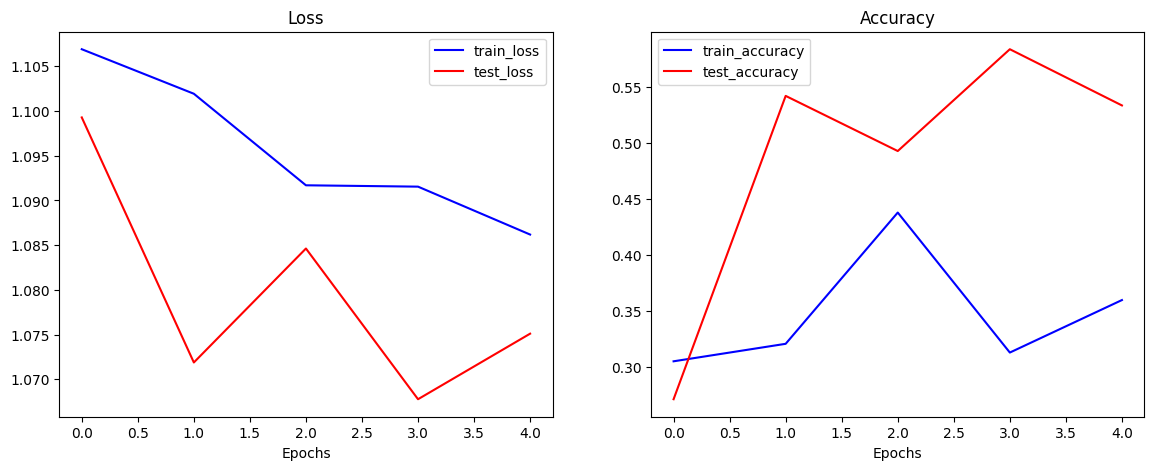

In [ ]:
plot_loss_curves(results=model_1_results)

# Compare the results of Model 0 and Model 1

In [ ]:
import pandas as pd

In [ ]:
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_accuracy,test_loss,test_accuracy
0,1.106319,0.304688,1.098321,0.301136
1,1.099806,0.328125,1.069690,0.541667
2,1.086854,0.488281,1.080757,0.492424
3,1.084233,0.398438,1.060832,0.583333
4,1.066216,0.414062,1.065396,0.564394


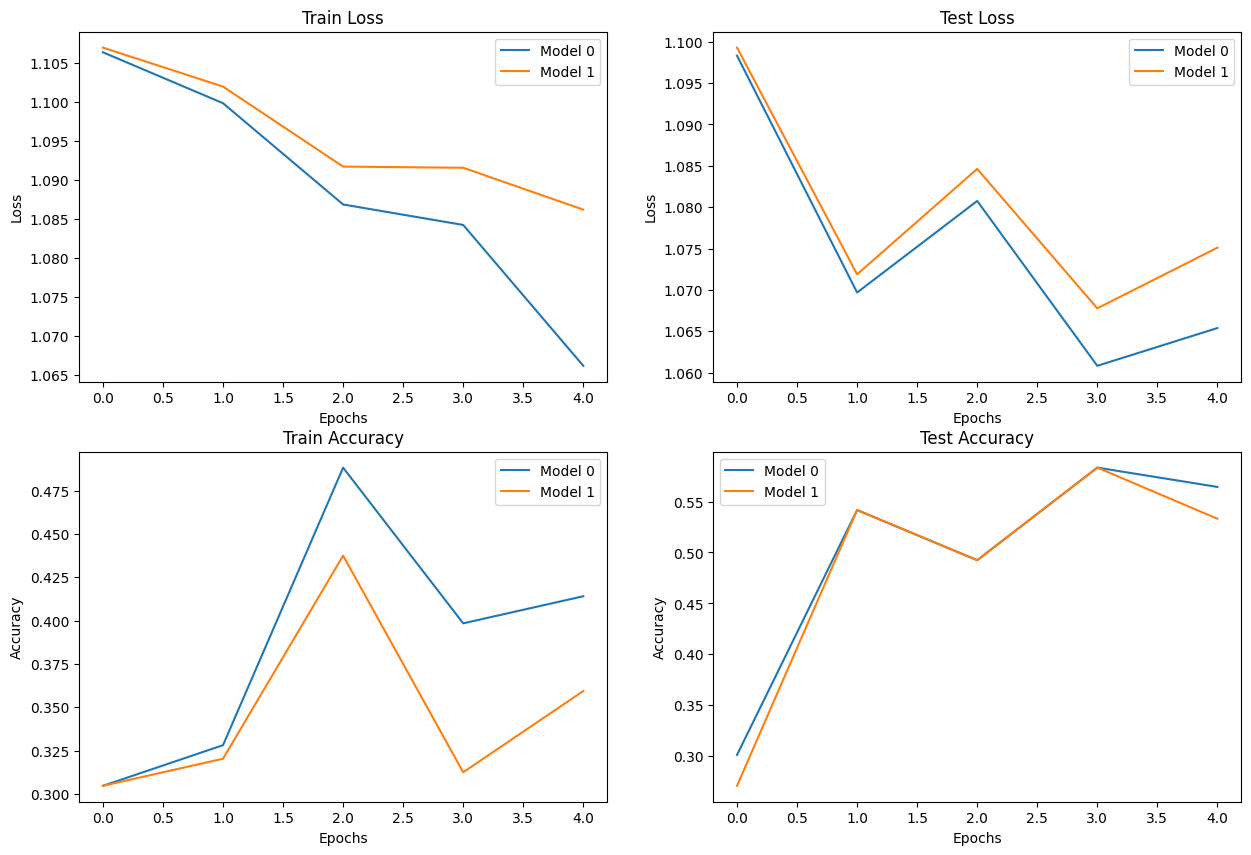

In [ ]:
plt.figure(figsize=(15, 10))

epochs = range(len(model_0_df))

plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_accuracy"], label="Model 0")
plt.plot(epochs, model_1_df["train_accuracy"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_accuracy"], label="Model 0")
plt.plot(epochs, model_1_df["test_accuracy"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Making Predictions on Custom Images

In [ ]:
import requests

In [ ]:
# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

image_URL = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg"

In [ ]:
# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get(image_URL)
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download...")

## Loading the custom image with PyTorch

torch.tensor(custom_image, dtype=torch.float32, size=(3, 64, 64).to(device)

In [ ]:
import torchvision

In [ ]:
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

print(f"Image Shape: {custom_image_uint8.shape}")
print(f"Image DType: {custom_image_uint8.dtype}")
print(f"Image Device: {custom_image_uint8.device}")

custom_image_uint8

Image Shape: torch.Size([3, 4032, 3024])
Image DType: torch.uint8
Image Device: cpu


tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

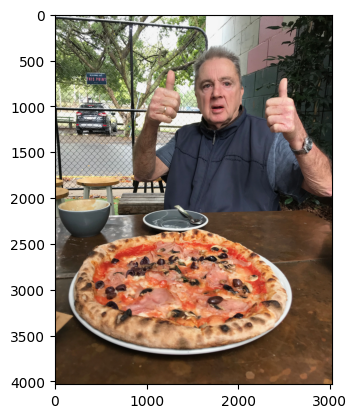

In [ ]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))

In [ ]:
normalized_image = custom_image_uint8.type(torch.float32) / 255

resize = transforms.Resize(size=(64, 64))
resized_image = resize(normalized_image)

print(f"Image Shape: {resized_image.shape}")
print(f"Image DType: {resized_image.dtype}")
print(f"Image Device: {resized_image.device}")

resized_image

Image Shape: torch.Size([3, 64, 64])
Image DType: torch.float32
Image Device: cpu


tensor([[[0.4673, 0.5292, 0.5601,  ..., 0.0976, 0.0604, 0.0578],
         [0.4014, 0.4351, 0.4291,  ..., 0.0671, 0.0714, 0.0848],
         [0.5172, 0.4849, 0.4472,  ..., 0.0613, 0.0605, 0.0694],
         ...,
         [0.2999, 0.2819, 0.2705,  ..., 0.4570, 0.4019, 0.3955],
         [0.2767, 0.2697, 0.2606,  ..., 0.4620, 0.4208, 0.3763],
         [0.2502, 0.2557, 0.2690,  ..., 0.4894, 0.6088, 0.5344]],

        [[0.4926, 0.5517, 0.5773,  ..., 0.1246, 0.0688, 0.0680],
         [0.4545, 0.4876, 0.4600,  ..., 0.0806, 0.0824, 0.1022],
         [0.5485, 0.5217, 0.4785,  ..., 0.0689, 0.0704, 0.0882],
         ...,
         [0.2066, 0.1971, 0.1882,  ..., 0.3125, 0.2772, 0.2778],
         [0.1922, 0.1870, 0.1805,  ..., 0.3217, 0.2926, 0.2662],
         [0.1730, 0.1777, 0.1865,  ..., 0.3425, 0.4223, 0.3684]],

        [[0.4510, 0.5250, 0.5622,  ..., 0.0806, 0.0408, 0.0439],
         [0.3132, 0.3614, 0.3848,  ..., 0.0508, 0.0532, 0.0766],
         [0.4766, 0.4248, 0.3951,  ..., 0.0463, 0.0469, 0.

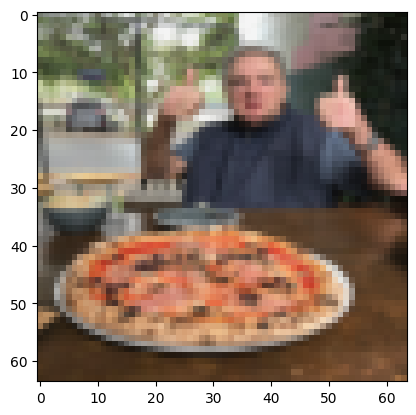

In [ ]:
plt.imshow(resized_image.permute(1, 2, 0))

## Making Predictions

In [ ]:
# model_1.eval()
# with torch.inference_mode():
#     logits = model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [ ]:
model_1.eval()
with torch.inference_mode():
    logits = model_1(resized_image.unsqueeze(dim=0).to(device))
    class_pred = class_names[torch.softmax(logits, dim=1).argmax(dim=1).cpu()]
class_pred

'sushi'

## Building Function for Getting the Prediction

In [ ]:
def prediction(model: torch.nn.Module,
               file_path: str,
               class_names: List[str]=None,
               image_transform: torchvision.transforms=None,
               device=device
               ):

    # Getting the image and formatting it.
    image = torchvision.io.read_image(str(file_path)).type(torch.float32) / 255   ## Default: dtype=uint8, image_range=[0, 255]

    if image_transform:
        image = image_transform(image)

    # Getting the prediction
    model.to(device)
    model.eval()
    with torch.inference_mode():
        logits = model(image.unsqueeze(dim=0).to(device))

    pred_probs = torch.softmax(logits, dim=1).cpu()
    prediction = torch.argmax(pred_probs, dim=1).cpu()
    title = f"Predicted Class: {prediction} | Prediction Prob: {pred_probs.max(): .2f}%"
    if class_names:
        title = f"Predicted Class: {class_names[prediction]} | Prediction Prob: {pred_probs.max(): .2f}%"

    plt.imshow(image.permute(1, 2, 0))
    plt.title(title)
    plt.axis("off")
    return prediction

tensor([2])

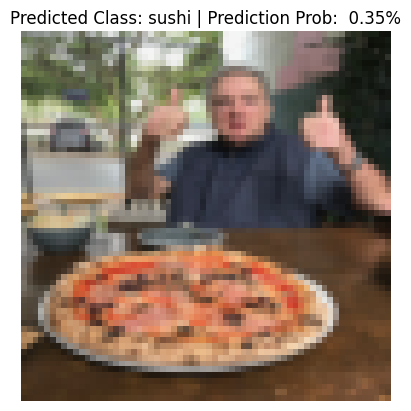

In [ ]:
image_transform = transforms.Compose([transforms.Resize(size=(64, 64))])
prediction(model_1, custom_image_path, class_names, image_transform)